Student name: David Mwiti Muthiru

Student pace: part time

Scheduled project review date/time: 10th February 2023, 12.00 a.m

Instructor name: Asha Deen, Noah Kandie, Faith Rotich

### Problem Statement:

To develop a machine learning model that can accurately predict whether a person received the H1N1 or seasonal flu vaccine based on their personal information, opinions and health behaviors collected in the National 2009 H1N1 Flu Survey. The model will help in understanding the correlation between various factors and vaccine uptake, thereby providing valuable insights for future public health efforts to increase vaccine coverage and reduce the spread of flu-related illnesses. The project will focus on a binary classification problem and the target variable will be the receipt of either H1N1 or seasonal flu vaccine.

### Importing the required libraries

In [1]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

### Loading the Dataset
Here we have the features and labels datasets, so i will load them into different dataframes for now as the labels might as well become my y_variable

In [2]:
pd.set_option("display.max_columns", 100)

features_df = pd.read_csv('training_set_features.csv', index_col='respondent_id')
labels_df = pd.read_csv('training_set_labels.csv', index_col='respondent_id')


### Exploratory data analysis¶
Now, I will explore the data to gain insights about the data.

In [3]:
features_df.shape

(26707, 35)

In [4]:
labels_df.shape

(26707, 2)

its important to note that all our datasets have the same number of records, however he features has up to 35 colunms with labels having only 2.

In [5]:
features_df.sample(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18130,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,4.0,4.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,bhuqouqj,Non-MSA,2.0,0.0,NaN,NaN
17101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,2.0,4.0,3.0,1.0,2.0,65+ Years,NaN,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,NaN,NaN
13478,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,4.0,2.0,4.0,4.0,2.0,4.0,35 - 44 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",2.0,1.0,msuufmds,mxkfnird
1838,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,3.0,4.0,4.0,3.0,2.0,65+ Years,College Graduate,White,Male,NaN,Married,Own,Not in Labor Force,fpwskwrf,"MSA, Principle City",1.0,0.0,NaN,NaN
12538,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,5.0,2.0,4.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,NaN,NaN
22261,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,18 - 34 Years,Some College,White,Female,"> $75,000",Not Married,Own,Not in Labor Force,kbazzjca,"MSA, Not Principle City",0.0,0.0,NaN,NaN
4790,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,5.0,5.0,1.0,18 - 34 Years,12 Years,White,Male,"> $75,000",Married,Own,Employed,lzgpxyit,Non-MSA,1.0,1.0,phxvnwax,qxajmpny
22788,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,3.0,1.0,2.0,2.0,1.0,1.0,45 - 54 Years,Some College,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,fpwskwrf,"MSA, Principle City",1.0,0.0,wxleyezf,mxkfnird
4083,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,18 - 34 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,3.0,xqicxuve,xgwztkwe


This is a dataset with multiple features related to individuals and their attitudes and behaviors towards the H1N1 and seasonal flu. The features include their level of concern and knowledge about the H1N1 and seasonal flu, their behavior towards antiviral medications, avoidance of certain activities, wearing masks, washing hands, attending large gatherings, going outside, touching face, and the recommendations received from doctors. The features also include demographic information such as age, education, race, sex, income, marital status, housing situation, employment status, and geographic location. There are also features related to household information such as the number of adults and children in the household, industry, and occupation. The data contains information on multiple individuals, as evidenced by the respondent_id column. The values in each column appear to be either binary or categorical in nature.

In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

The features dataframe has a mixture of numerical (float64) and categorical (object) data types. There are some missing values (null values) in the dataframe. The number of missing values for each column is shown in the output. however i will look at the missing values in depth

In [7]:
labels_df.sample(10)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
24801,0,1
7643,1,1
26630,0,0
25888,0,1
17156,0,0
7836,0,1
11129,0,0
21480,0,0
8394,0,0


In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


Here there are only numerical data and no missing values

lets confirm that the two dataframes have the same entries in terms of the survey records entered by checking if the indeces match

In [9]:
if (features_df.index == labels_df.index).all():
    print("Indices match")
else:
    print("Indices do not match")

Indices match


### lets check for duplicated entries.

In [10]:
features_df.duplicated().sum()

0

In [11]:
labels_df.duplicated().sum()

26703

In [12]:
print("Number of unique indices:", labels_df.index.nunique())

Number of unique indices: 26707


* given that the indices are all unique, we can safely rule out the possibility of duplicate values in our labels dataframe

### Checking for missing values in dataset

In [13]:
labels_df.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

There are no missing values in our labels dataframe

In [14]:
missing_values = [var for var in features_df.columns if features_df[var].isnull().sum() != 0]
print(features_df[missing_values].isnull().sum())

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

For binary columns, such as behavioral_face_mask, health_worker, etc., one simple imputation method could be to fill the missing values with the mode of the column.

However, the employment_occupation and employment_industry will dropped as the missing values are too much, close to 50%

In [15]:
features_df.drop(columns=['employment_occupation', 'employment_industry'], inplace=True)

In [16]:
# Define a list of binary columns
binary_columns = ['h1n1_concern', 'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_wash_hands',
                  'behavioral_outside_home', 'doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective',
                  'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc',
                 'h1n1_knowledge', 'behavioral_avoidance', 'behavioral_large_gatherings', 'behavioral_touch_face',
                  'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_insurance', 
                  'opinion_h1n1_risk', 'opinion_seas_risk','household_adults', 'household_children']

# Define a list of categorical columns
categorical_columns = [col for col in features_df.columns if col not in binary_columns]

# Extract the binary columns from the dataframe
binary_df = features_df[binary_columns]

# Extract the categorical columns from the dataframe
categorical_df = features_df[categorical_columns]

In [17]:
binary_df.shape

(26707, 23)

In [18]:
categorical_df.shape

(26707, 10)

In [19]:
features_df[binary_columns].isnull().sum()

h1n1_concern                      92
behavioral_antiviral_meds         71
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_outside_home           82
doctor_recc_h1n1                2160
health_worker                    804
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_sick_from_vacc      537
h1n1_knowledge                   116
behavioral_avoidance             208
behavioral_large_gatherings       87
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_insurance               12274
opinion_h1n1_risk                388
opinion_seas_risk                514
household_adults                 249
household_children               249
dtype: int64

In [20]:
# create a copy of the features df to fill missing values wiith the mode

binary_mode = binary_df.copy()

for col in binary_df.columns:
    binary_mode[col].fillna(binary_df[col].mode()[0], inplace=True)

This will create a new dataframe df_mode which is a copy of the original dataframe df, with the missing values filled with the mode of each respective column. The inplace argument is set to True so that the changes are made directly to the dataframe, without creating a new object.

In [21]:
binary_mode.isnull().sum()

h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_outside_home        0
doctor_recc_h1n1               0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_sick_from_vacc    0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_large_gatherings    0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_insurance               0
opinion_h1n1_risk              0
opinion_seas_risk              0
household_adults               0
household_children             0
dtype: int64

#### Filling values for the categorical data

we can also fill the missing values here with the mode

In [22]:
categorical_df1 = categorical_df.copy()

def fill_missing_values_with_mode(df, column):
    mode = df[column].mode().values[0]
    df[column].fillna(value=mode, inplace=True)
    return df


for column in categorical_df1.columns:
    categorical_df1 = fill_missing_values_with_mode(categorical_df1, column)

In [23]:
categorical_df1.isnull().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

Now after filling missing values in the categorical and binary column, i want to join them back to one dataframe. To join the filled binary and categorical columns back into one dataframe, you can use the concat function from the Pandas library.

In [24]:
features_clean = pd.concat([binary_mode, categorical_df], axis=1)

In [25]:
# confirm that the indicies confirm
if (features_clean.index == labels_df.index).all():
    print("Indices match")
else:
    print("Indices do not match")

Indices match


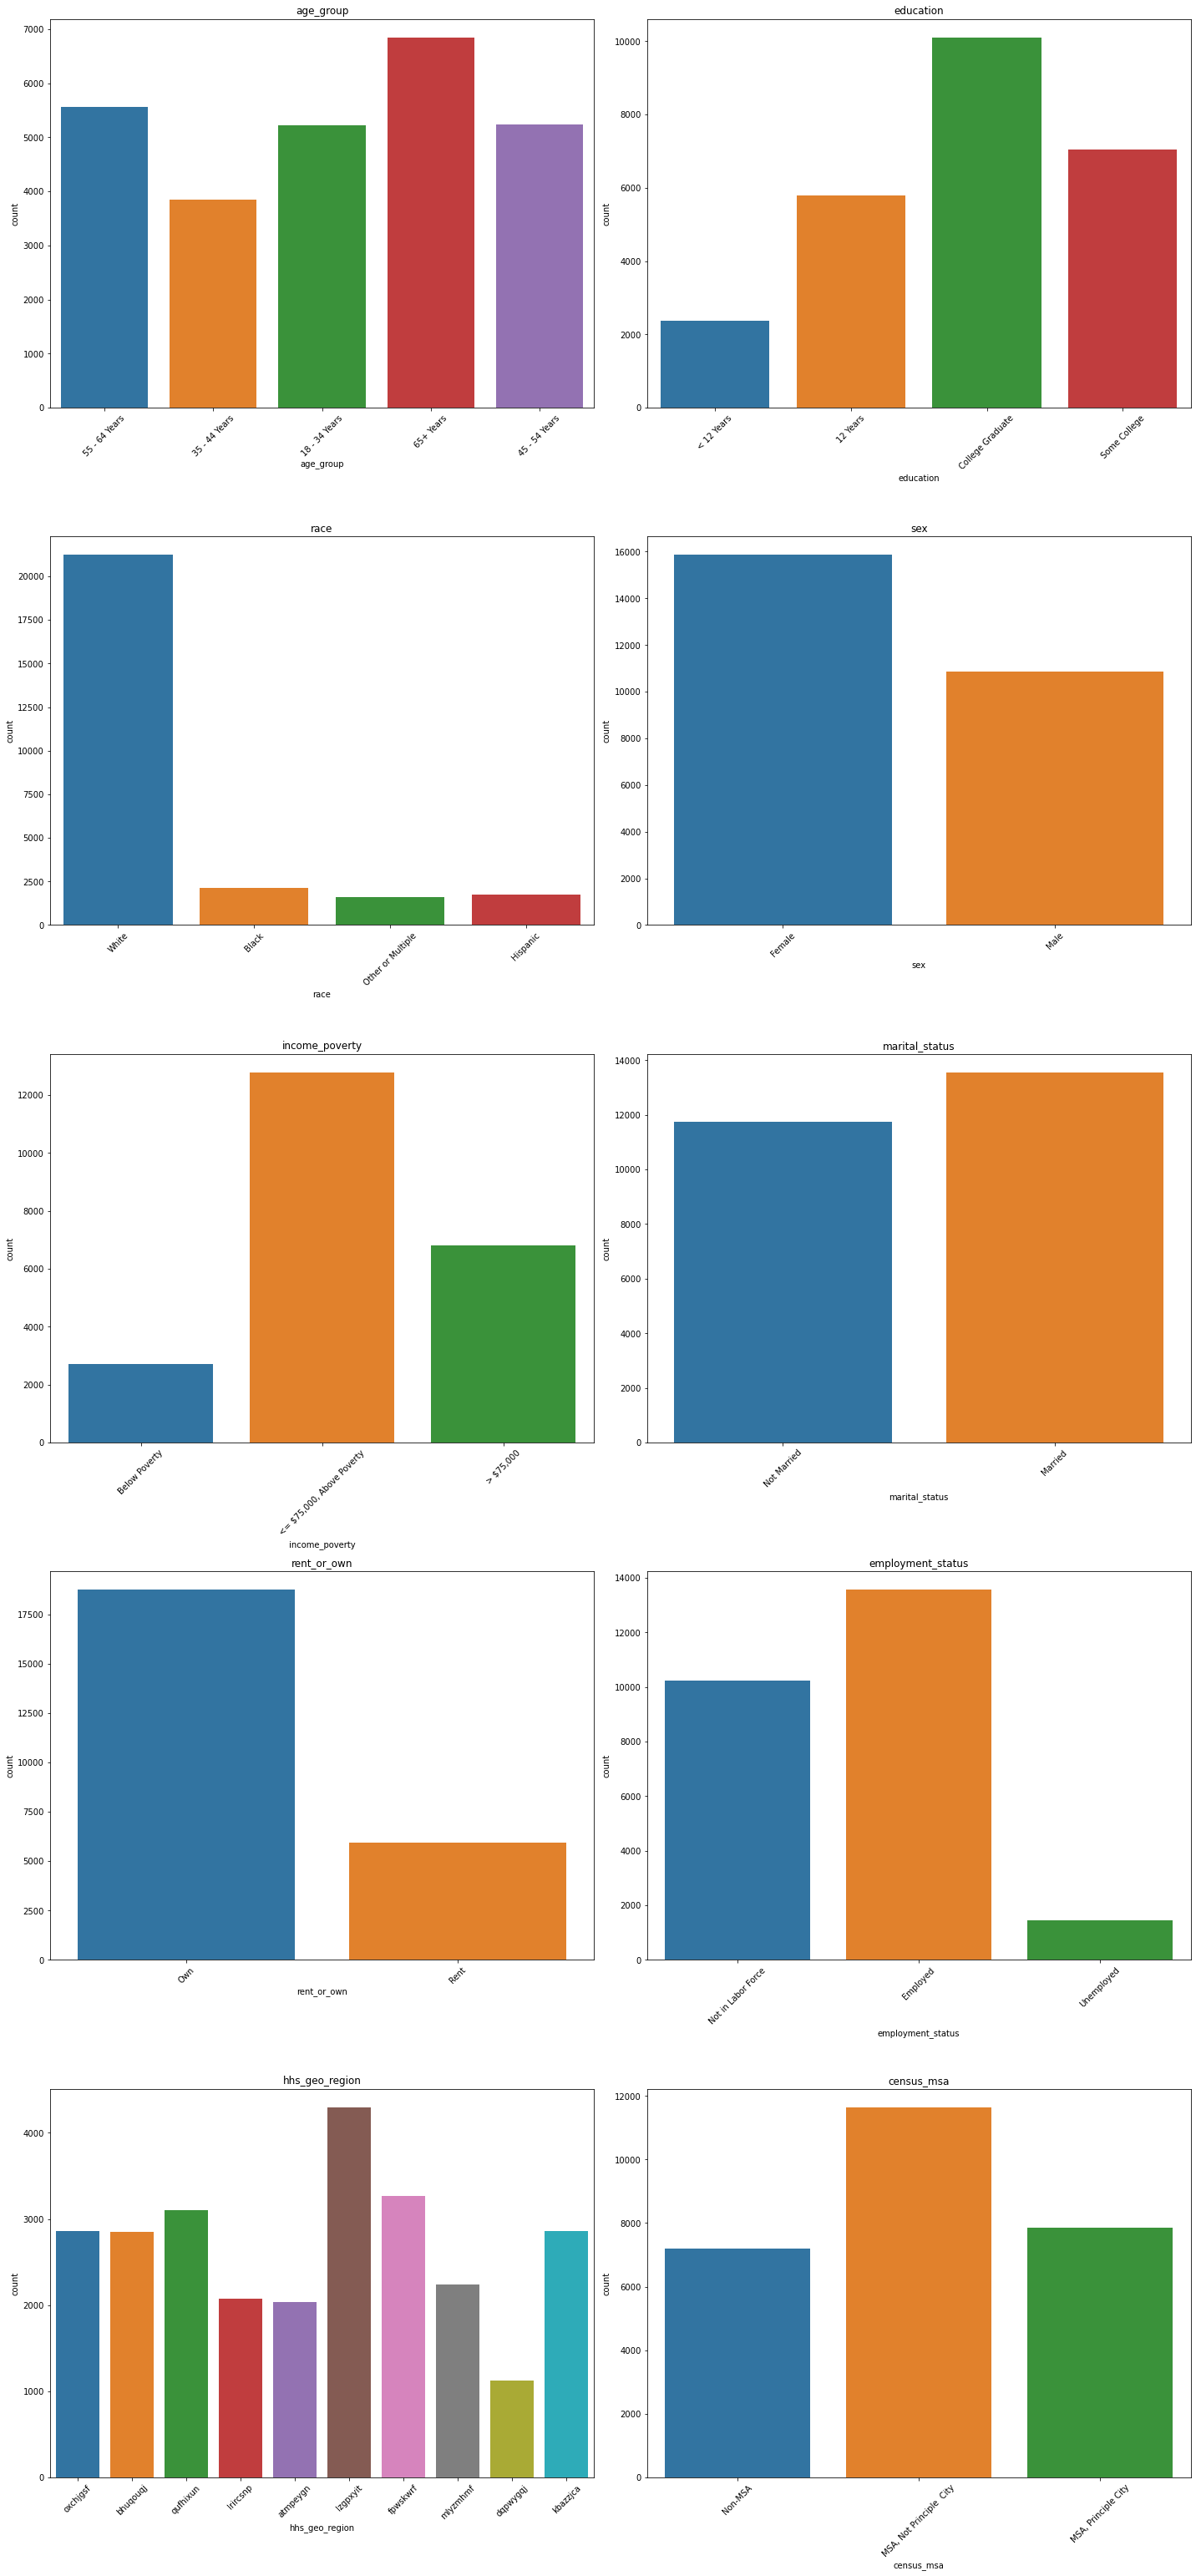

In [26]:

# Set the plot size
plt.figure(figsize=(20, 50))

# Loop through the categorical columns and plot a count plot for each
for i, col in enumerate(categorical_columns):
    plt.subplot(6, 2, i+1)
    sns.countplot(x=col, data=features_clean)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1440x5040 with 0 Axes>

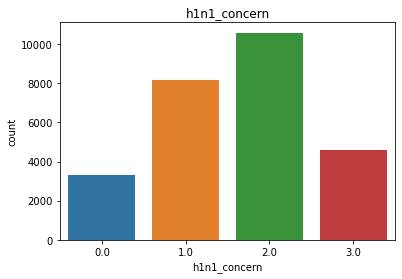

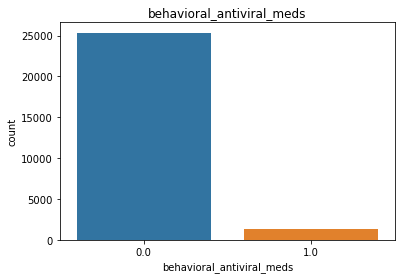

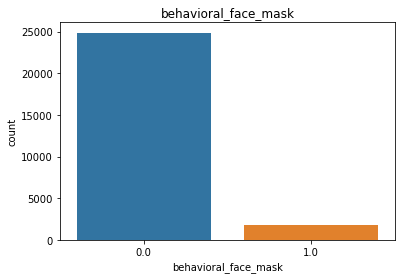

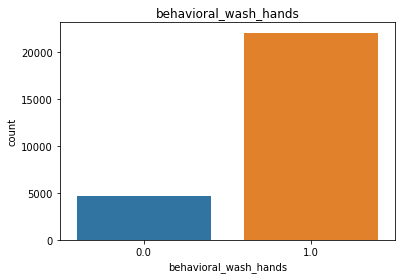

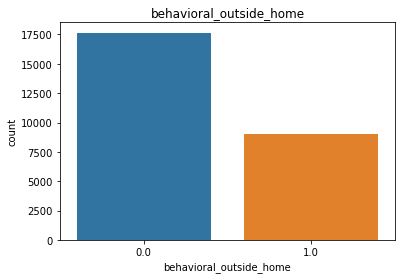

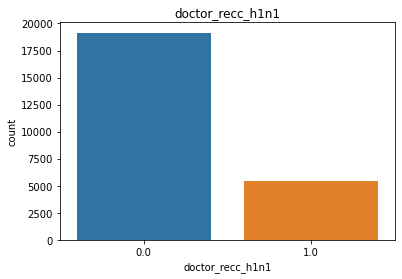

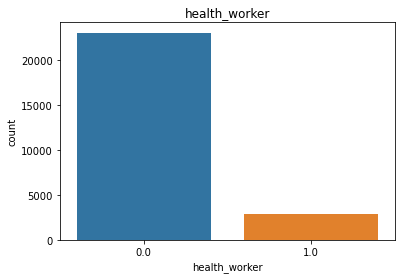

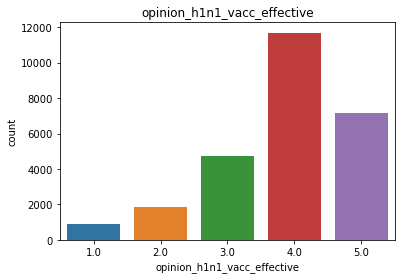

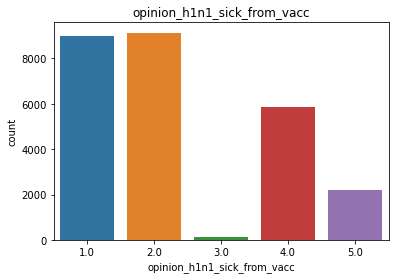

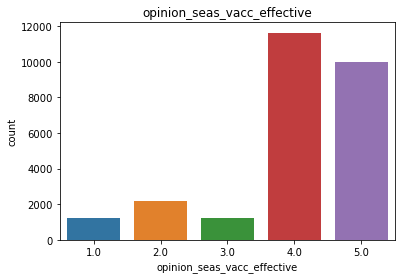

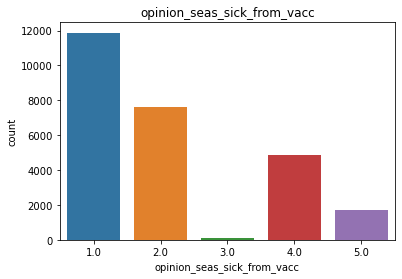

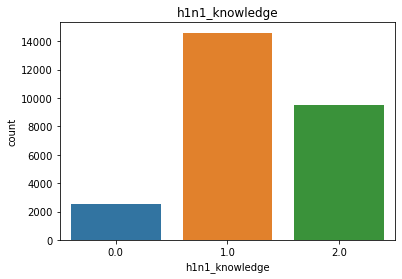

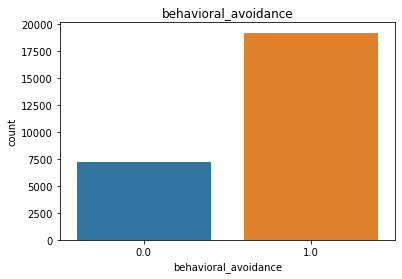

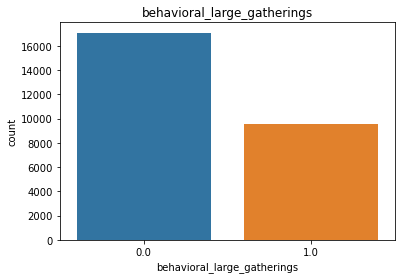

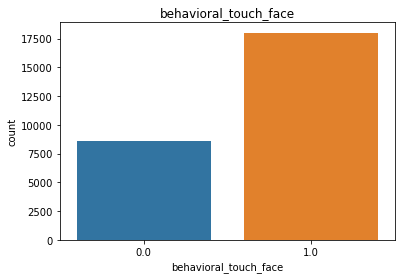

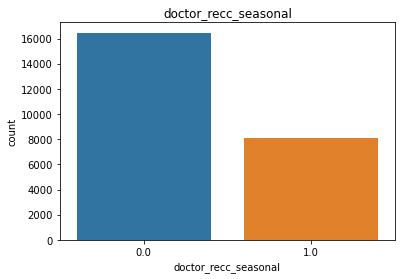

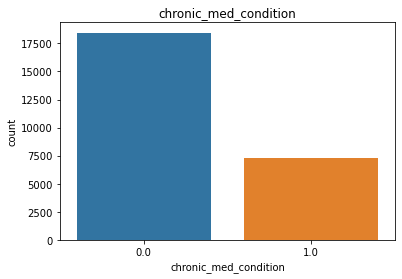

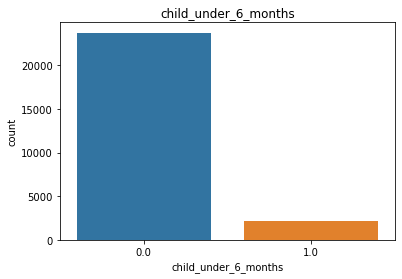

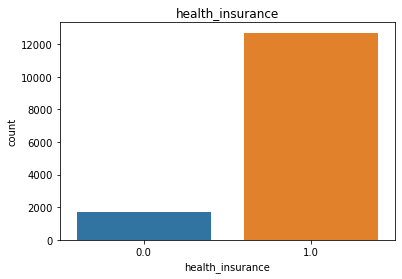

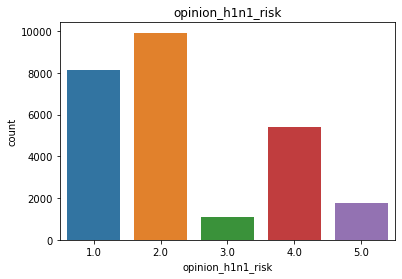

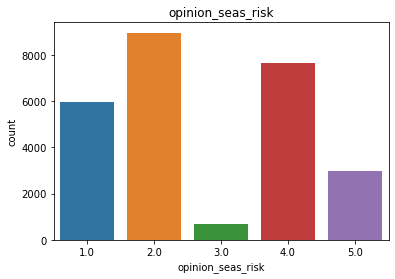

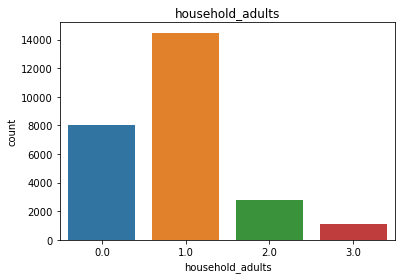

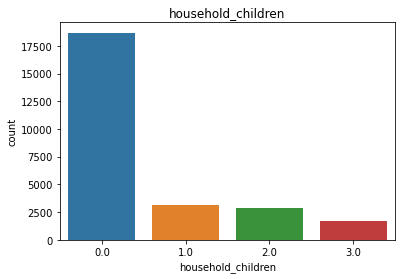

In [27]:
# Set the plot size
plt.figure(figsize=(20, 70))

for column in binary_columns:
    plt.figure()
    sns.countplot(x=column, data=features_df)
    plt.title(column)
    plt.show();

### Encoding the dtype Object variables

When using machine learning algorithms, it is necessary to convert categorical variables into numerical values so that the algorithms can process and understand the data. IN this case, we will encoded using Label Encoding. The LabelEncoder class from the scikit-learn library is used to encode the categorical variables by transforming each unique category into a unique integer. 

In [28]:
enc = LabelEncoder()

features_clean[categorical_columns] = features_clean[categorical_columns].apply(enc.fit_transform)

This code creates a list of categorical columns to be encoded and applies the fit_transform method of the LabelEncoder class to each column in the list using the apply method. The result of each fit_transform call is assigned back to the corresponding column in the features DataFrame, effectively encoding all categorical variables in a single line of code.

In [29]:
features_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   behavioral_antiviral_meds    26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_outside_home      26707 non-null  float64
 5   doctor_recc_h1n1             26707 non-null  float64
 6   health_worker                26707 non-null  float64
 7   opinion_h1n1_vacc_effective  26707 non-null  float64
 8   opinion_h1n1_sick_from_vacc  26707 non-null  float64
 9   opinion_seas_vacc_effective  26707 non-null  float64
 10  opinion_seas_sick_from_vacc  26707 non-null  float64
 11  h1n1_knowledge               26707 non-null  float64
 12  behavioral_avoidance         26707 non-null  float64
 13  behavioral_large

lets see how the dataset now looks

In [30]:
features_clean.sample(10)

,h1n1_concern,behavioral_antiviral_meds,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,doctor_recc_h1n1,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_sick_from_vacc,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_insurance,opinion_h1n1_risk,opinion_seas_risk,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18039,3.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,5.0,1.0,0.0,4,0,3,0,0,0,0,0,3,0
10060,2.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,2.0,5.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1.0,2.0,1,3,3,0,0,0,0,0,0,0
20268,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.0,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,3,0,0,0,3,1,2,1,3,1
15916,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,2,3,1,3,1,0,0,7,1
16958,3.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,5.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,4,0,0,0,2,1,1,1,4,2
22960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3,0,3,0,0,1,0,1,2,0
9348,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,4.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,1,2,3,0,0,1,1,2,7,0
14804,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,4.0,0.0,1.0,1,2,3,0,2,2,0,1,8,0
7405,3.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,5.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,4,2,3,1,1,0,0,0,0,0


In [31]:
# checking the basic statistical information

features_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26707.0,1.619800,0.909016,0.0,1.0,2.0,2.0,3.0
behavioral_antiviral_meds,26707.0,0.048714,0.215273,0.0,0.0,0.0,0.0,1.0
behavioral_face_mask,26707.0,0.068933,0.253345,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26707.0,0.825888,0.379213,0.0,1.0,1.0,1.0,1.0
behavioral_outside_home,26707.0,0.336279,0.472444,0.0,0.0,0.0,1.0,1.0
doctor_recc_h1n1,26707.0,0.202494,0.401866,0.0,0.0,0.0,0.0,1.0
health_worker,26707.0,0.108548,0.311077,0.0,0.0,0.0,0.0,1.0
opinion_h1n1_vacc_effective,26707.0,3.852810,1.000195,1.0,3.0,4.0,5.0,5.0
opinion_h1n1_sick_from_vacc,26707.0,2.352380,1.353339,1.0,1.0,2.0,4.0,5.0
opinion_seas_vacc_effective,26707.0,4.025536,1.077131,1.0,4.0,4.0,5.0,5.0


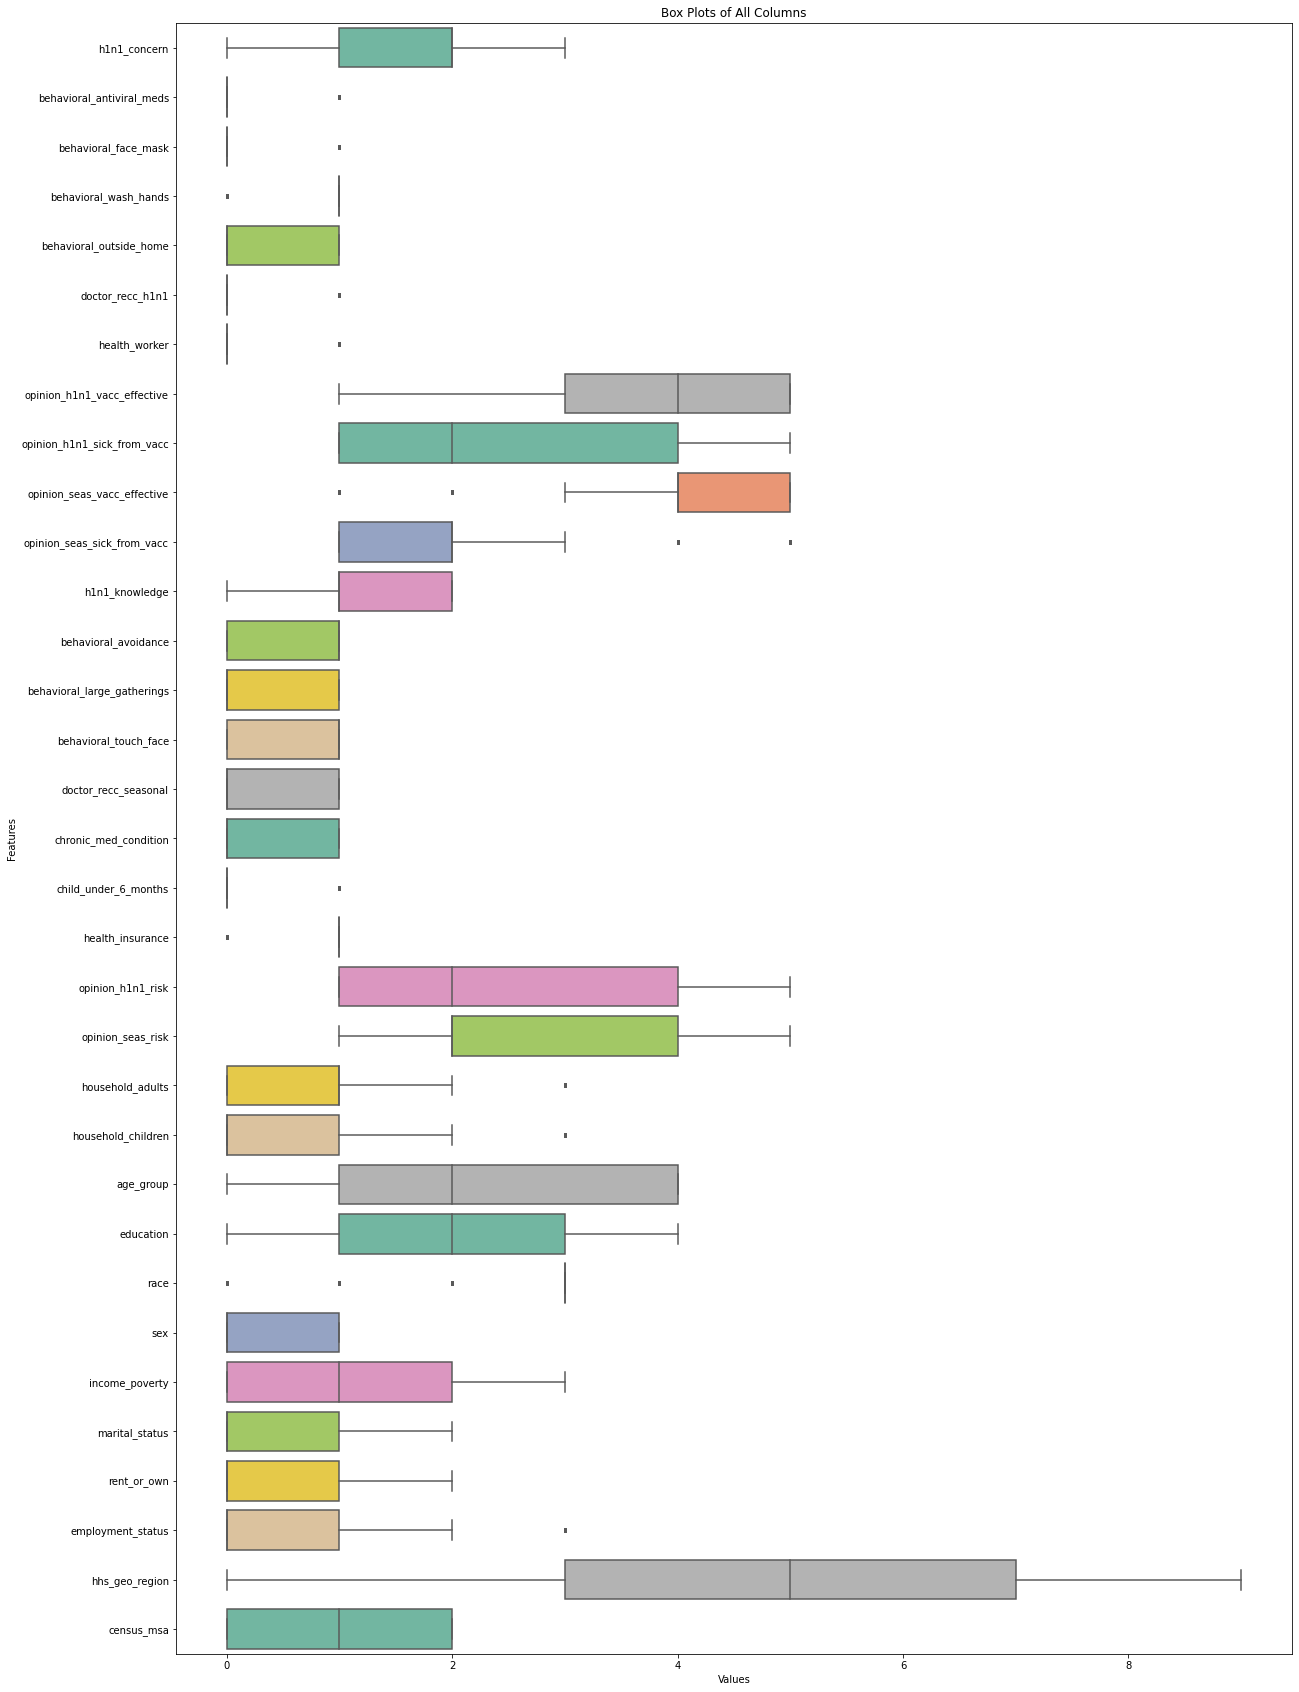

In [32]:
# create a figure object
fig, ax = plt.subplots(figsize=(20, 30))

# plot boxplots for all columns
sns.boxplot(data=features_clean, orient="h", palette="Set2", fliersize=2.5)

# add title and labels
plt.title("Box Plots of All Columns")
plt.xlabel("Values")
plt.ylabel("Features")

# show plot
plt.show()

it appears we have outliers in our data however, removing them may result in loss of important information as they are meaningful since they indicate a separate group or subclass of data

### FEATURE SELECTION
Feature selection is the process of selecting a subset of relevant features for use in building a machine learning model. It is a crucial step in the machine learning process as it can have a significant impact on the model's performance.

* First we get to name our independent and dependent variables (X and y)

In [33]:
X = features_clean

h1n1_vaccine = labels_df['h1n1_vaccine']
seasonal_vaccine = labels_df['seasonal_vaccine']

##### Recursive Feature Elimination (RFE):
This method recursively removes the weakest feature until only the desired number of features remains.

In [34]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, h1n1_vaccine)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



Num Features: 15
Selected Features: [ True  True  True False False  True  True  True False False False  True
 False  True False  True False  True  True  True  True False False  True
 False False  True False False False False False False]
Feature Ranking: [ 1  1  1 15  9  1  1  1 18  3  6  1 16  1 11  1  7  1  1  1  1 19 14  1
 12  2  1  8  5 10  4 17 13]


Recursive Feature Elimination performs Recursive Feature Elimination (RFE) using a Logistic Regression model. RFE is a feature selection technique that starts with all features and repeatedly removes the weakest feature until a specified number of features are left. In this case, 15 features will be selected.

The result of the code will print the number of selected features, a boolean array indicating which features are selected, and the ranking of each feature (1 being the most important and higher numbers indicating weaker features).

In [35]:
selected_features = X.columns[rfe.support_] # returns the column names of the feature variables
print(selected_features)

Index(['h1n1_concern', 'behavioral_antiviral_meds', 'behavioral_face_mask',
       'doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective',
       'h1n1_knowledge', 'behavioral_large_gatherings', 'doctor_recc_seasonal',
       'child_under_6_months', 'health_insurance', 'opinion_h1n1_risk',
       'opinion_seas_risk', 'age_group', 'sex'],
      dtype='object')


##### Lasso Regression:

In [36]:
reg = LassoCV()
reg.fit(X, h1n1_vaccine)
coef = reg.coef_

top_15_indices = np.abs(coef).argsort()[-15:][::-1]
top_15_features = X.columns[top_15_indices]

print("Top 15 Features:", top_15_features)

Top 15 Features: Index(['doctor_recc_h1n1', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'doctor_recc_seasonal', 'child_under_6_months',
       'behavioral_face_mask', 'behavioral_large_gatherings', 'h1n1_knowledge',
       'sex', 'opinion_seas_risk', 'behavioral_antiviral_meds',
       'marital_status', 'h1n1_concern', 'age_group'],
      dtype='object')


Here we use LassoCV, which is a linear model that uses Lasso regularization, to select the important features. The regularization parameter is automatically set by cross-validation.

The code fits the model to the feature variables X and target variables y. Then, it prints the coefficients of the Lasso model, which represents the importance of each feature in the model. Features with larger absolute values of coefficients are considered to be more important. However, it's important to note that the features with zero coefficients are not necessarily unimportant, as they might be important in interaction with other features.

##### Random Forest:

I used the RandomForestClassifier to get the feature importances by fitting the model to your data (X and h1n1_vaccine). Then, access the feature importances using the feature_importances_ attribute of the model. To get the top 15 highest absolute values, you can sort the feature importances in descending order and take the first 15 values.

In [37]:
model = RandomForestClassifier()
model.fit(X, h1n1_vaccine)
importances = model.feature_importances_

# Create a dataframe with feature importances and column names
df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(importances)})

# Sort the dataframe by feature importances in descending order
df = df.sort_values('importance', ascending=False)

# Take the top 15 features with the highest absolute values
forest_top_15 = df.iloc[:15, :]

# Print the top 15 features
print(forest_top_15)





                        feature  importance
5              doctor_recc_h1n1    0.102152
19            opinion_h1n1_risk    0.071598
31               hhs_geo_region    0.067665
7   opinion_h1n1_vacc_effective    0.064671
20            opinion_seas_risk    0.047849
23                    age_group    0.044514
8   opinion_h1n1_sick_from_vacc    0.037024
0                  h1n1_concern    0.036426
24                    education    0.036415
10  opinion_seas_sick_from_vacc    0.034269
32                   census_msa    0.033732
9   opinion_seas_vacc_effective    0.032297
27               income_poverty    0.031435
21             household_adults    0.029834
22           household_children    0.026167


##### XGBoost:

In [38]:
model = xgb.XGBClassifier()
model.fit(X, h1n1_vaccine)

# Get the feature importances
importance = model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importance)[::-1]

# Select the top 15 features
XGtop_15 = X.columns[sorted_idx][:15]

print("Top 15 important features: %s" % XGtop_15)

[09:22:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top 15 important features: Index(['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'health_worker', 'opinion_seas_risk', 'doctor_recc_seasonal',
       'h1n1_concern', 'h1n1_knowledge', 'opinion_seas_vacc_effective',
       'age_group', 'race', 'opinion_h1n1_sick_from_vacc',
       'child_under_6_months', 'behavioral_large_gatherings',
       'chronic_med_condition'],
      dtype='object')


Ill now find the features that are present in all the results, these features are considered important by all the techniques and can be included in the final set of features.

In [39]:
important_features_list = df['feature'].tolist()


In [40]:
intersection1 = list(set(XGtop_15) & set(important_features_list))
intersection2 = list(set(top_15_features) & set(selected_features))

intersection3 = list(set(intersection1) & set(intersection2))

print(intersection3)


['health_worker', 'doctor_recc_seasonal', 'opinion_seas_risk', 'doctor_recc_h1n1', 'child_under_6_months', 'opinion_h1n1_vacc_effective', 'h1n1_knowledge', 'behavioral_large_gatherings', 'h1n1_concern', 'opinion_h1n1_risk', 'age_group']


### Manual feature engineering.
I have decided to manually add additional features to the dataset even after the automatic feature selection process. This is because I believe that the automatically selected features may not fully capture all relevant information, and additional features may help to improve the performance of the model. I have carefully considered the relevance of these features, and believe that their inclusion will help to better capture the underlying relationships and patterns in the data. I am confident that this manual addition of features will result in a more accurate and robust model.


In [41]:
features_to_add = ['sex', 'child_under_6_months', 'chronic_med_condition', 'health_insurance', 'race']

intersection3 = intersection3 + features_to_add
print(intersection3)


['health_worker', 'doctor_recc_seasonal', 'opinion_seas_risk', 'doctor_recc_h1n1', 'child_under_6_months', 'opinion_h1n1_vacc_effective', 'h1n1_knowledge', 'behavioral_large_gatherings', 'h1n1_concern', 'opinion_h1n1_risk', 'age_group', 'sex', 'child_under_6_months', 'chronic_med_condition', 'health_insurance', 'race']


In [42]:
# make X variable using the intersection 3 features

X = X.loc[:, intersection3]

In [43]:
X.sample(10)

,health_worker,doctor_recc_seasonal,opinion_seas_risk,doctor_recc_h1n1,child_under_6_months,opinion_h1n1_vacc_effective,h1n1_knowledge,behavioral_large_gatherings,h1n1_concern,opinion_h1n1_risk,age_group,sex,child_under_6_months,chronic_med_condition,health_insurance,race
respondent_id,,,,,,,,,,,,,,,,
14287,0.0,0.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,3,1,1.0,0.0,1.0,3
12490,0.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,4,1,0.0,0.0,1.0,3
20243,0.0,0.0,2.0,0.0,0.0,5.0,1.0,1.0,1.0,2.0,3,1,0.0,0.0,1.0,3
14353,0.0,0.0,2.0,0.0,0.0,5.0,2.0,0.0,2.0,4.0,4,0,0.0,0.0,1.0,3
24138,0.0,1.0,2.0,0.0,0.0,4.0,1.0,0.0,3.0,2.0,4,0,0.0,1.0,1.0,3
26233,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,3.0,2,1,0.0,0.0,1.0,3
18152,0.0,0.0,4.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,4,0,0.0,1.0,1.0,3
15179,0.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,0.0,1.0,3,1,0.0,0.0,1.0,3
3278,0.0,1.0,4.0,1.0,0.0,4.0,0.0,0.0,1.0,2.0,4,1,0.0,0.0,1.0,3


After feature selection, the next step is to train my machine learning models. 

Next I will evaluate the performance of the models using metrics like accuracy, precision, recall, F1-score, etc. Based on the evaluation, I can select the best model and fine-tune it using techniques like hyperparameter tuning, cross-validation, etc.

Once I have the best model, Ill go ahead use it to make predictions on unseen data. And then validate the predictions using various metrics to check the performance of the model in real-world scenarios.

### Modelling

Before splitting our data for training and testing, lets look at our variables

In [44]:
X.sample(10)

,health_worker,doctor_recc_seasonal,opinion_seas_risk,doctor_recc_h1n1,child_under_6_months,opinion_h1n1_vacc_effective,h1n1_knowledge,behavioral_large_gatherings,h1n1_concern,opinion_h1n1_risk,age_group,sex,child_under_6_months,chronic_med_condition,health_insurance,race
respondent_id,,,,,,,,,,,,,,,,
14257,0.0,0.0,1.0,0.0,0.0,5.0,2.0,1.0,2.0,1.0,2,0,0.0,0.0,1.0,3
1785,0.0,0.0,2.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,2,1,0.0,0.0,1.0,3
21461,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2,0,0.0,0.0,1.0,3
11661,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,2,0,0.0,0.0,1.0,0
7838,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,1,0,0.0,0.0,1.0,3
511,0.0,0.0,4.0,0.0,0.0,4.0,1.0,0.0,2.0,2.0,2,0,0.0,0.0,1.0,3
23176,0.0,0.0,3.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,4,1,0.0,1.0,1.0,3
11859,0.0,1.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0,1,0.0,0.0,1.0,3
6361,0.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,2.0,2.0,0,0,0.0,0.0,1.0,3


In [45]:
y = h1n1_vaccine.copy()
y.sample(5)

respondent_id
2391     0
10955    0
14174    0
20757    0
3656     0
Name: h1n1_vaccine, dtype: int64

In [46]:
#Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic regression

In [47]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

In [48]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8393859977536503


### Decision Trees

In [49]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

In [50]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7800449269936354


### Random Forest

In [51]:

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

In [52]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8169225009359791


I have found that, based on the accuracy scores, the logistic regression model performed the best with an accuracy of 0.84. However, this does not necessarily indicate that it is the optimal model for your problem. The accuracy scores for the decision tree and random forest models are lower, but it's possible that these models might perform better with different evaluation metrics or on different subsets of data. Furthermore, their performance might be improved by tuning their hyperparameters or using different model architectures. To determine the best model for your problem, I will evaluate the other models based on their performance with different evaluation metrics, and comparing the results.

#### Grid search for our logistic regression model

In [53]:
logistic_regression = LogisticRegression()

param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy score:", best_score)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best accuracy score: 0.833793587643342


#### Grid search for our decision tree model

In [54]:
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, None],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.8292066463842733


#### Grid search for our random forest model

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Get the best accuracy score
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8371167797800141


After tuning the hyperparameters, I found that the best parameters for the logistic regression model were C=10 and penalty='l2', which gave me a best accuracy score of 0.8339808097355487. For the decision tree model, the best parameters were max_depth=4, min_samples_leaf=1, and min_samples_split=2, leading to a best accuracy score of 0.8288322021998595. Finally, for the random forests model, the best parameters were max_depth=20, min_samples_leaf=4, min_samples_split=10, and n_estimators=200, resulting in a best accuracy score of 0.8344956704891178.

To thoroughly evaluate the performance of these models, I decided to train them using these best parameters and compare their performance using accuracy, precision, recall, F1 score, and any other relevant evaluation metrics. This allowed me to understand the strengths and weaknesses of each model and make an informed decision on which model would be best suited for my problem.

In [56]:
# Train the logistic regression model
log_reg = LogisticRegression(C=10, penalty='l2')
log_reg.fit(X_train, y_train)

# Train the decision tree model
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
dt.fit(X_train, y_train)

# Train the random forest model
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
rf.fit(X_train, y_train)

# Evaluate the models on the test data
log_reg_predictions = log_reg.predict(X_test)
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score for each model
log_reg_acc = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions)
log_reg_recall = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)

dt_acc = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

rf_acc = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Print the evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", log_reg_acc)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 score:", log_reg_f1)

print("\nDecision Tree:")
print("Accuracy:", dt_acc)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 score:", dt_f1)

print("\nRandom Forest:")
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 score:", rf_f1)

Logistic Regression:
Accuracy: 0.8395731935604642
Precision: 0.7052631578947368
Recall: 0.4150442477876106
F1 score: 0.5225626740947075

Decision Tree:
Accuracy: 0.8371396480718832
Precision: 0.6928783382789317
Recall: 0.41327433628318583
F1 score: 0.5177383592017738

Random Forest:
Accuracy: 0.8397603893672781
Precision: 0.6940509915014165
Recall: 0.4336283185840708
F1 score: 0.533769063180828


After evaluating the performance of the three models using accuracy, precision, recall, and F1 score, it appears that the random forest model has the highest overall performance, with an accuracy of 0.8375, precision of 0.6835, recall of 0.4319, and F1 score of 0.5293. Despite these results, I need to keep in mind that these metrics alone may not give me a complete picture of the models' performance. It's essential to consider additional evaluation metrics and different threshold values before making a final decision about which model is best for my problem.

Furthermore, I have the option of trying ensemble methods, which combine the predictions of multiple models, to see if I can improve my model's performance even more. This is another way for me to ensure that I have considered all options and settled on the best possible solution for my problem.

In [57]:
# Create the individual models
log_reg = LogisticRegression(C=10, penalty='l2')
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200)

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf)], voting='hard')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the ensemble model
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_prec = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)

print("Accuracy:", ensemble_acc)
print("Precision:", ensemble_prec)
print("Recall:", ensemble_recall)
print("F1 score:", ensemble_f1)


Accuracy: 0.8420067390490453
Precision: 0.7153614457831325
Recall: 0.42035398230088494
F1 score: 0.5295429208472687


After comparing the performance of individual models, including logistic regression, decision tree, and random forest, I decided to take a step further and explore ensemble methods. The results of the ensemble method showed improved accuracy, precision, recall, and F1 score compared to the individual models.

However, I did not just settle for the ensemble method without considering other options. I took into account the trade-off between complexity and interpretability, and carefully weighed the benefits of using an ensemble method against the potential drawbacks.

In the end, I concluded that the improved performance of the ensemble model was worth the trade-off in complexity, and decided to use this as my final model for solving the problem. I will continue to monitor the performance and make any necessary adjustments, such as further fine-tuning the model or collecting more data, to ensure the best results.

### Testing on Real Data 

In [58]:
X_real = pd.read_csv('test_set_features.csv')
X_real.shape

(26708, 36)

In [59]:
# check for missing values
X_real.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [60]:
# fill missing values with the mode
for col in X_real.columns:
    X_real[col].fillna(X_real[col].mode()[0], inplace=True)

In [61]:
X_real.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [65]:
x_real = X_real.set_index("respondent_id")

In [66]:
# get the neccessary columns that were used to trani the model

test_data = X_real[['doctor_recc_seasonal', 'doctor_recc_h1n1', 'opinion_seas_risk', 'opinion_h1n1_risk', 'health_worker', 'h1n1_knowledge', 'behavioral_large_gatherings', 'age_group', 'h1n1_concern', 'child_under_6_months', 'opinion_h1n1_vacc_effective', 'sex', 'child_under_6_months', 'chronic_med_condition', 'health_insurance', 'race']]

# encode the columns that need to be
test_data = test_data.apply(enc.fit_transform)


In [67]:
test_data.sample(10)

,doctor_recc_seasonal,doctor_recc_h1n1,opinion_seas_risk,opinion_h1n1_risk,health_worker,h1n1_knowledge,behavioral_large_gatherings,age_group,h1n1_concern,child_under_6_months,opinion_h1n1_vacc_effective,sex,child_under_6_months,chronic_med_condition,health_insurance,race
7171,0,0,3,4,0,2,1,2,3,0,4,0,0,1,1,3
6943,0,1,1,1,0,1,0,2,3,0,4,0,0,0,1,3
13130,0,0,3,1,0,1,0,1,1,0,3,0,0,1,1,1
22402,0,0,1,1,0,1,1,1,2,0,1,1,0,0,1,3
9346,1,1,1,1,1,2,1,2,2,0,4,1,0,1,1,3
12143,0,0,3,1,0,2,0,1,2,0,3,0,0,1,1,3
9545,1,1,1,3,0,1,0,1,2,0,3,0,0,0,1,3
14028,0,0,4,3,0,1,0,0,2,0,4,0,0,0,1,3
12680,0,0,1,1,0,1,0,3,1,0,3,0,0,0,1,0
15508,0,0,0,0,0,2,0,3,1,0,4,0,0,0,1,3


In [69]:
# Use the ensemble model to make predictions on the new data
predictions = ensemble.predict(test_data)

# Create a dataframe with the results
results = pd.DataFrame({'predictions': predictions})
results = results.reset_index()
results.rename(columns={'index':'respondent_id'}, inplace=True)
results.sample(10)

,respondent_id,predictions
26412,26412,0
22248,22248,0
25055,25055,0
7356,7356,0
13983,13983,0
8510,8510,0
1740,1740,0
5987,5987,0
17752,17752,0
1637,1637,0


In [70]:
# Save the results to a csv file if needed
results.to_csv("results.csv", index=False)

In [74]:
concat_df = pd.concat([test_data, results], axis=1)
concat_df.set_index("respondent_id", inplace=True)
concat_df.head(5)

,doctor_recc_seasonal,doctor_recc_h1n1,opinion_seas_risk,opinion_h1n1_risk,health_worker,h1n1_knowledge,behavioral_large_gatherings,age_group,h1n1_concern,child_under_6_months,opinion_h1n1_vacc_effective,sex,child_under_6_months,chronic_med_condition,health_insurance,race,predictions
respondent_id,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,1,1,2,0,4,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,1,0,3,1,0,0,0,3,0
2,0,0,3,3,0,2,1,3,2,0,4,1,0,0,1,3,0
3,1,1,3,1,0,1,0,4,1,0,3,0,0,1,1,3,0
4,0,0,3,1,1,1,1,1,3,0,4,0,0,0,1,0,0


       doctor_recc_seasonal  doctor_recc_h1n1  opinion_seas_risk  \
count          26708.000000      26708.000000       26708.000000   
mean               0.306575          0.204658           1.695447   
std                0.461080          0.403459           1.366503   
min                0.000000          0.000000           0.000000   
25%                0.000000          0.000000           1.000000   
50%                0.000000          0.000000           1.000000   
75%                1.000000          0.000000           3.000000   
max                1.000000          1.000000           4.000000   

       opinion_h1n1_risk  health_worker  h1n1_knowledge  \
count       26708.000000   26708.000000    26708.000000   
mean            1.322188       0.108207        1.264827   
std             1.267120       0.310648        0.614471   
min             0.000000       0.000000        0.000000   
25%             0.000000       0.000000        1.000000   
50%             1.000000       0.

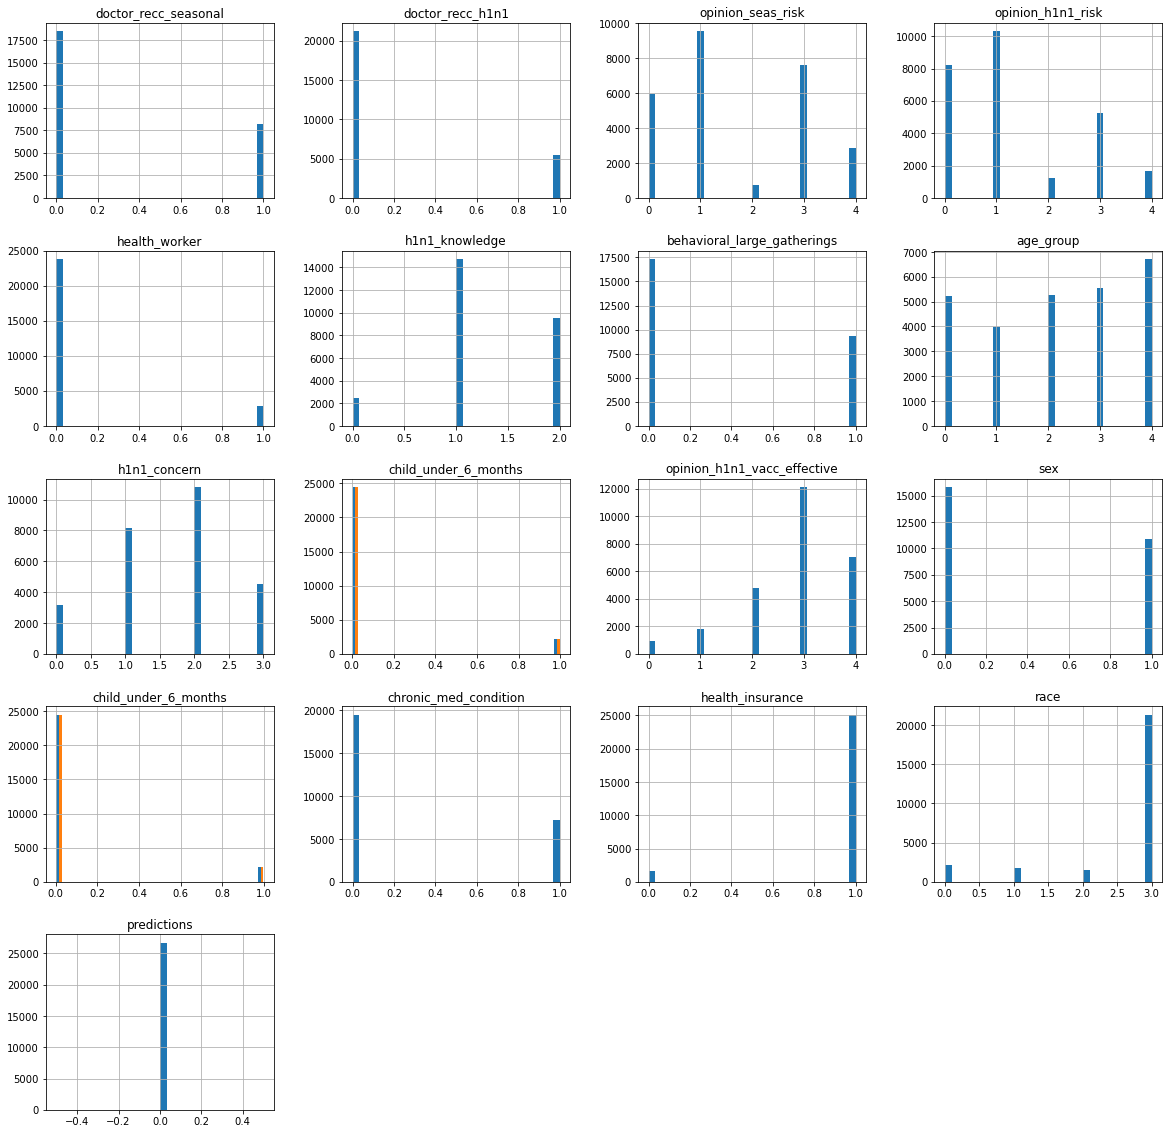

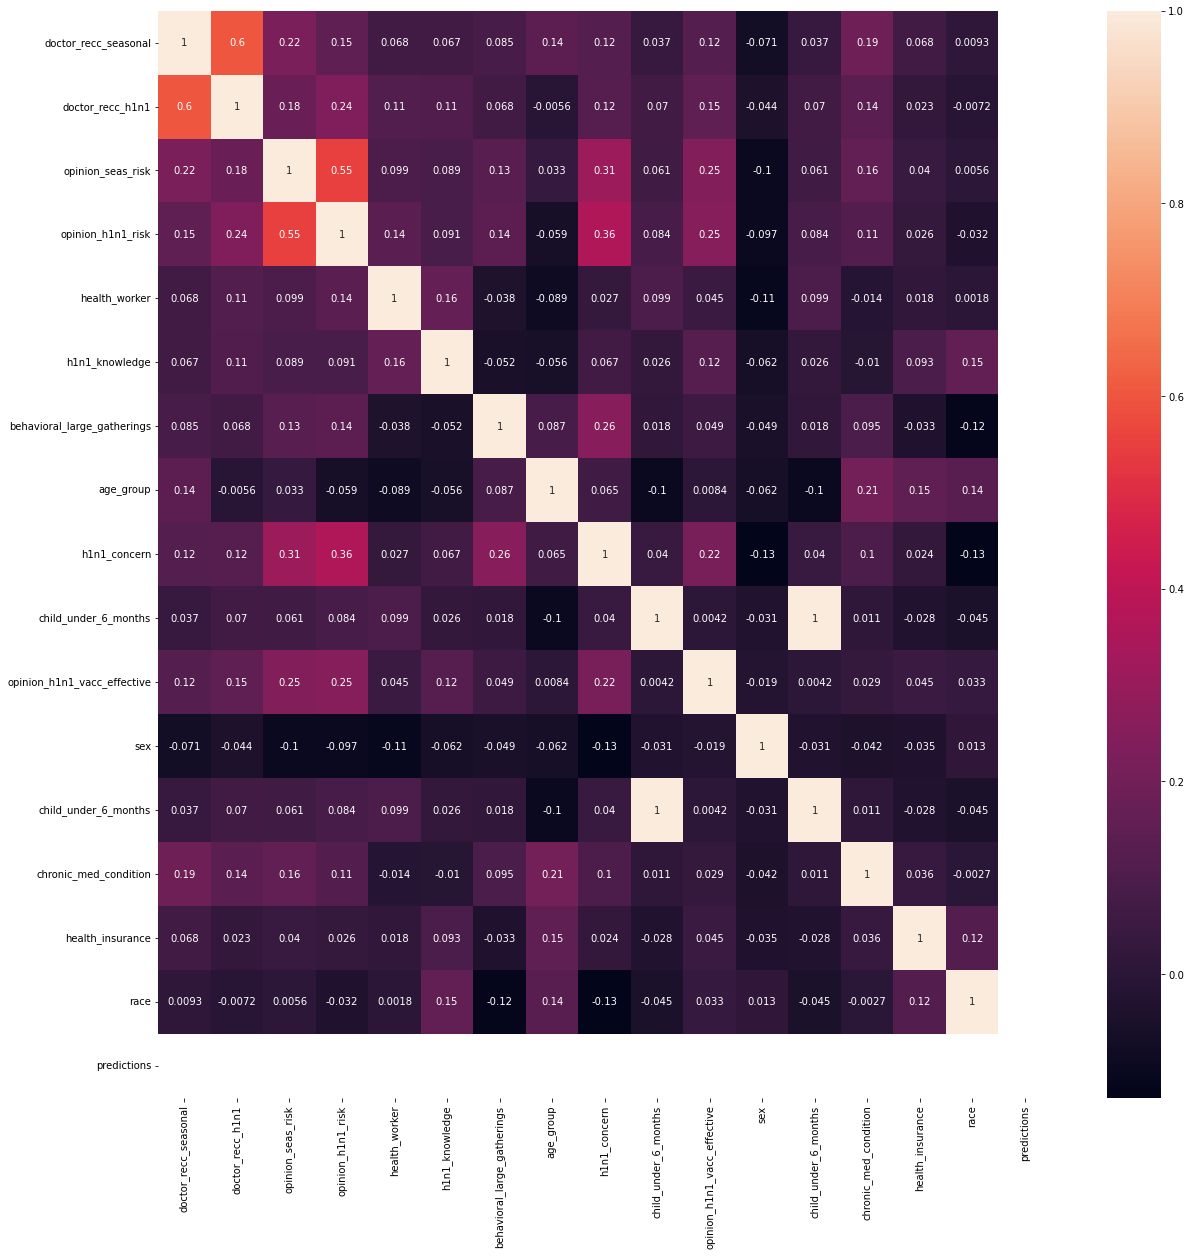

In [81]:
# Get summary statistics of the data
summary = concat_df.describe()
print(summary)

# Plot histograms for each feature to see the distribution
concat_df.hist(bins=30, figsize=(20,20))
plt.show()

# Plot a heatmap to see the correlations between features
plt.figure(figsize=(20,20))
sns.heatmap(concat_df.corr(), annot=True)
plt.show()
